/tmp/ipykernel_34085/904533732.py:41: RuntimeWarning: divide by zero encountered in divide
  T_hat = q_dot_S_hat / (alpha * K2)
/tmp/ipykernel_34085/904533732.py:41: RuntimeWarning: invalid value encountered in divide
  T_hat = q_dot_S_hat / (alpha * K2)


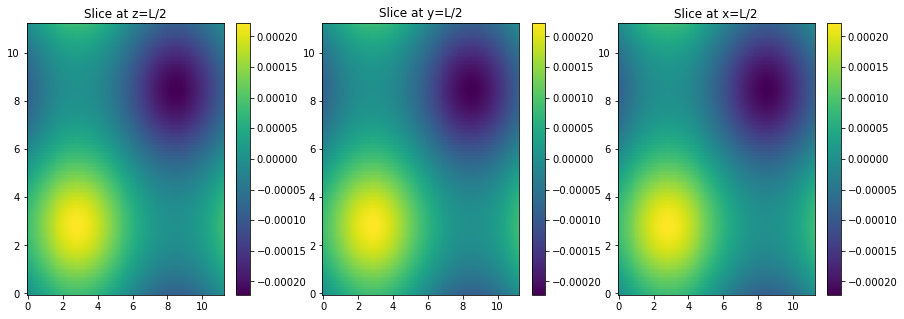

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# Define the 3D domain
L = 11.3
N = 100
x = np.linspace(0, L, N, endpoint=False)
y = np.linspace(0, L, N, endpoint=False)
z = np.linspace(0, L, N, endpoint=False)
X, Y, Z = np.meshgrid(x, y, z, indexing='ij')

dt = 1e-4
num_steps = 100

# Define spherical heat sources and sinks
def spherical_heat_source_sink(X, Y, Z, L, radius=0.1):
    center_source = np.array([L/4, L/4, L/4])
    center_sink = np.array([3*L/4, 3*L/4, 3*L/4])
    source = np.exp(-np.sum((np.stack((X,Y,Z), axis=-1) - center_source) ** 2, axis=-1) / (2 * radius ** 2))
    sink = -np.exp(-np.sum((np.stack((X,Y,Z), axis=-1) - center_sink) ** 2, axis=-1) / (2 * radius ** 2))
    return source + sink

q_dot_S = spherical_heat_source_sink(X, Y, Z, L)

# Fourier transform of the heat source field
q_dot_S_hat = np.fft.fftn(q_dot_S)

# Define the thermal diffusivity alpha
alpha = 1.0

# Solve for the Fourier coefficients of the temperature field
kx = np.fft.fftfreq(N, d=L/N) * 2 * np.pi
ky = np.fft.fftfreq(N, d=L/N) * 2 * np.pi
kz = np.fft.fftfreq(N, d=L/N) * 2 * np.pi


KX, KY, KZ = np.meshgrid(kx, ky, kz, indexing='ij')
K2 = KX**2 + KY**2 + KZ**2


T_hat = q_dot_S_hat / (alpha * K2)
T_hat[0, 0, 0] = 0  # set the mean (DC component) to zero for simplicity
# Inverse Fourier transform to get the temperature field
T = np.fft.ifftn(T_hat).real

for _ in range(num_steps):
    T_hat = np.fft.fftn(T)
    T_hat_new = T_hat / (1 + dt * alpha * K2)
    T = np.fft.ifftn(T_hat_new).real


# Plot slices through the 3D temperature field
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.pcolormesh(x, y, T[:, :, N//2])
plt.colorbar()
plt.title('Slice at z=L/2')
plt.subplot(1, 3, 2)
plt.pcolormesh(x, z, T[:, N//2, :])
plt.colorbar()
plt.title('Slice at y=L/2')
plt.subplot(1, 3, 3)
plt.pcolormesh(y, z, T[N//2, :, :])
plt.colorbar()
plt.title('Slice at x=L/2')
plt.show()
